https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
# Set the path to the dataset
dataset_path = 'Rice_Image_Dataset/'

# Initialize empty lists
images = []
labels = []

# Loop over the subfolders
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [3]:
df.head()

,image,label
0,Rice_Image_Dataset/Arborio\Arborio (1).jpg,Arborio
1,Rice_Image_Dataset/Arborio\Arborio (10).jpg,Arborio
2,Rice_Image_Dataset/Arborio\Arborio (100).jpg,Arborio
3,Rice_Image_Dataset/Arborio\Arborio (1000).jpg,Arborio
4,Rice_Image_Dataset/Arborio\Arborio (10000).jpg,Arborio


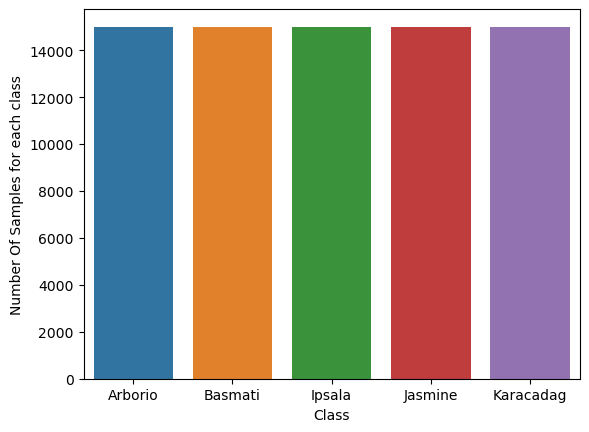

In [4]:
# plot the classes
ax = sns.countplot(x=df.label)

ax.set_xlabel("Class")
ax.set_ylabel("Number Of Samples for each class")

plt.show()

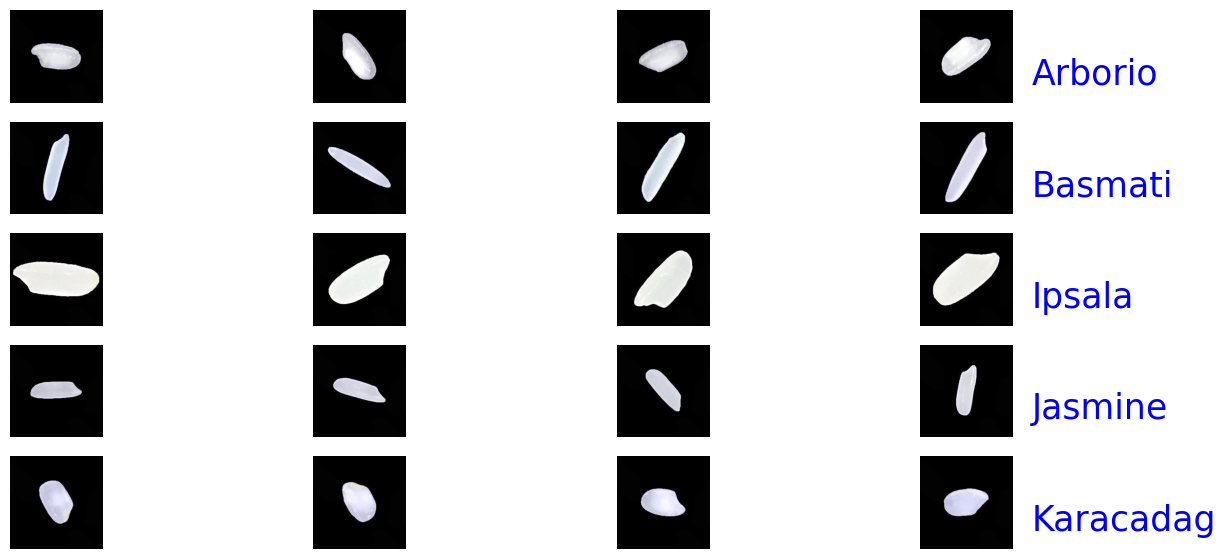

In [5]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add a label to the bottom of the subplot grid
    ax.text(300, 200, category, fontsize=25, color='blue')

plt.show()

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

In [7]:
# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

In [8]:
# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

In [9]:
# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [10]:
# pip install --upgrade keras

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 60000 validated image filenames belonging to 5 classes.


In [13]:
# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15000 validated image filenames belonging to 5 classes.


#### Train the Model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

C:\Users\saura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5


C:\Users\saura\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 165s 87ms/step - accuracy: 0.7500 - loss: 0.6051 - val_accuracy: 0.9358 - val_loss: 0.1759
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 170s 90ms/step - accuracy: 0.9343 - loss: 0.1796 - val_accuracy: 0.9514 - val_loss: 0.1348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 172s 92ms/step - accuracy: 0.9555 - loss: 0.1205 - val_accuracy: 0.9677 - val_loss: 0.0881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 167s 89ms/step - accuracy: 0.9642 - loss: 0.0989 - val_accuracy: 0.9766 - val_loss: 0.0701
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 166s 88ms/step - accuracy: 0.9701 - loss: 0.0844 - val_accuracy: 0.9645 - val_loss: 0.0965


#### Evaluation: 

In [17]:
history_dict = history.history

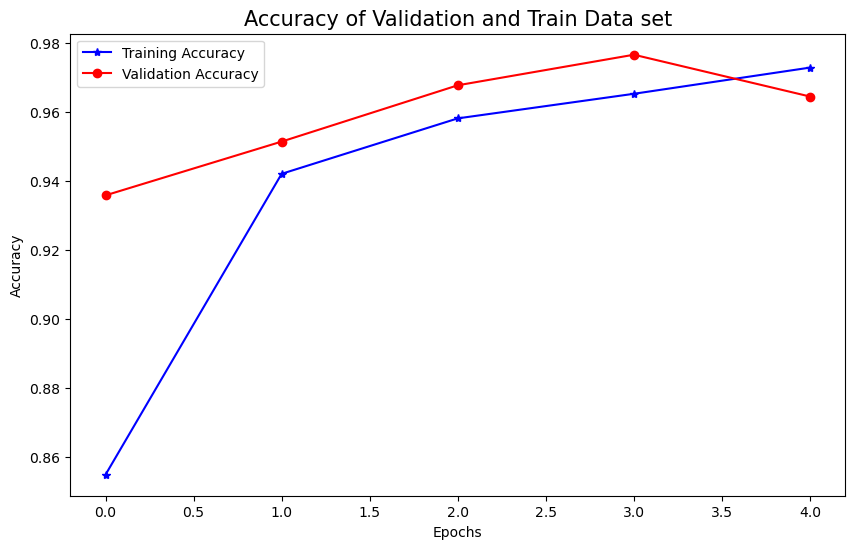

In [23]:
#Accuracy of Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history_dict['accuracy'], color="Blue", marker='*', label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], color='Red', marker='o', label='Validation Accuracy')
plt.title('Accuracy of Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()